# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


# Import Dataset

In [3]:
data = pd.read_csv("E:\\EDA\\fill.csv")

In [4]:
data.head()

,Unnamed: 0,Customer Name,Review Title,Rating,Reviews
0,0,Rahul T,Overall I'll call it value for money although ...,4.0 out of 5 stars,It consumes around 10gb of storage in 24hour...
1,1,Sukdeb Das,cannot connect the device,1.0 out of 5 stars,I cannot connect the device with my Jiofi s...
2,2,Amazon Customer,Under 3K best ip cam from Mi,5.0 out of 5 stars,Pros:1) Simple install (only first time you ...
3,3,Pothi Kalimuthu,"Other than initial hiccups, some (Mi Home app)...",3.0 out of 5 stars,Remember... nothing is perfect. Xiaomi has a...
4,4,Krish B,Installation Issue,1.0 out of 5 stars,Any future buyer.. this product may be a goo...


In [5]:
data = data.drop(data.columns[[0]], axis=1)

In [6]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Rahul T,Overall I'll call it value for money although ...,4.0 out of 5 stars,It consumes around 10gb of storage in 24hour...
1,Sukdeb Das,cannot connect the device,1.0 out of 5 stars,I cannot connect the device with my Jiofi s...
2,Amazon Customer,Under 3K best ip cam from Mi,5.0 out of 5 stars,Pros:1) Simple install (only first time you ...
3,Pothi Kalimuthu,"Other than initial hiccups, some (Mi Home app)...",3.0 out of 5 stars,Remember... nothing is perfect. Xiaomi has a...
4,Krish B,Installation Issue,1.0 out of 5 stars,Any future buyer.. this product may be a goo...


In [7]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

# Foramting "Rating"column

In [8]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [9]:
data['Rating']

0       4.0
1       1.0
2       5.0
3       3.0
4       1.0
       ... 
4205    5.0
4206    5.0
4207    5.0
4208    4.0
4209    5.0
Name: Rating, Length: 4210, dtype: object

In [10]:
data['Rating'].value_counts(normalize=True)*100

5.0    62.066508
4.0    18.741093
1.0    10.403800
3.0     6.199525
2.0     2.589074
Name: Rating, dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  4210 non-null   object
 1   Review Title   4210 non-null   object
 2   Rating         4210 non-null   object
 3   Reviews        4210 non-null   object
dtypes: object(4)
memory usage: 131.7+ KB


In [12]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,438,438,438
2.0,109,109,109
3.0,261,261,261
4.0,789,789,789
5.0,2613,2613,2613


# Plot the graph(Distribution of Rating)

Text(0, 0.5, 'Count')

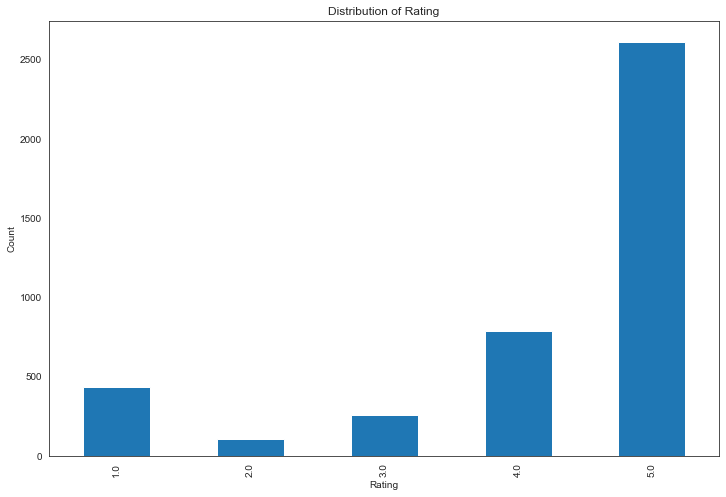

In [13]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot the graph(Distribution of Review Length)

Text(0, 0.5, 'Count')

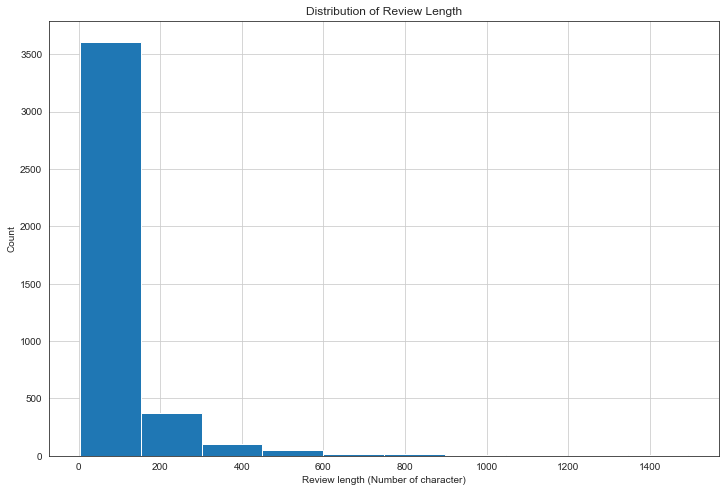

In [14]:
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

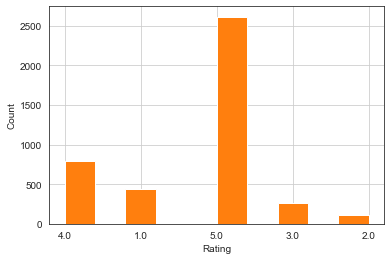

In [15]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [16]:
Reviews=data.iloc[:,[3]]

In [17]:
Reviews.shape

(4210, 1)

In [18]:
Reviews.describe()

,Reviews
count,4210
unique,3176
top,Good
freq,250


In [19]:
Reviews.head()

,Reviews
0,It consumes around 10gb of storage in 24hour...
1,I cannot connect the device with my Jiofi s...
2,Pros:1) Simple install (only first time you ...
3,Remember... nothing is perfect. Xiaomi has a...
4,Any future buyer.. this product may be a goo...


# Cleaning the data.


In [20]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

In [21]:
data.head()

,Rating,Reviews
0,4.0,It consumes around 10gb of storage in 24hour...
1,1.0,I cannot connect the device with my Jiofi s...
2,5.0,Pros:1) Simple install (only first time you ...
3,3.0,Remember... nothing is perfect. Xiaomi has a...
4,1.0,Any future buyer.. this product may be a goo...


In [22]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [23]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
            

In [24]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [25]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords


In [26]:
stop_words=stopwords.words('english')

In [27]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [28]:
data.head(5)

,Rating,Reviews
0,4.0,consumes around gb storage hours hd modepros n...
1,1.0,cannot connect device jiofi please help
2,5.0,pros simple install first time need configure ...
3,3.0,remember nothing perfect xiaomi already releas...
4,1.0,future buyer product may good one lucky ones e...


# Lemmatization

In [29]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [30]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [31]:
data['Reviews'].head()

0    consumes around gb storage hour hd modepros ni...
1              cannot connect device jiofi please help
2    pro simple install first time need configure c...
3    remember nothing perfect xiaomi already releas...
4    future buyer product may good one lucky one ex...
Name: Reviews, dtype: object

# TFIDF Matrix

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)


  (0, 3963)	0.11000595391919105
  (0, 1711)	0.12689494030150558
  (0, 593)	0.10781562044838174
  (0, 601)	0.06714101726008835
  (0, 2478)	0.13055519411622546
  (0, 1026)	0.11122155699702707
  (0, 109)	0.09406439349561121
  (0, 2558)	0.06332690279072106
  (0, 3614)	0.11122155699702707
  (0, 3783)	0.09198526814623176
  (0, 1808)	0.12689494030150558
  (0, 1799)	0.0998517701631052
  (0, 4583)	0.12390429517718805
  (0, 2794)	0.08183108439014593
  (0, 664)	0.11725339623815063
  (0, 831)	0.08726638025134731
  (0, 2177)	0.08880050081451696
  (0, 2617)	0.06848262037794639
  (0, 2059)	0.13055519411622546
  (0, 828)	0.07546300513109871
  (0, 3849)	0.09406439349561121
  (0, 4580)	0.08613468086070258
  (0, 3799)	0.23450679247630127
  (0, 654)	0.12390429517718805
  (0, 2816)	0.13055519411622546
  :	:
  (4208, 825)	0.09111443305263098
  (4208, 2475)	0.13062454725967135
  (4208, 3637)	0.06095197571364528
  (4208, 2194)	0.06604910670331163
  (4208, 519)	0.08793600604880913
  (4208, 1170)	0.054431217937

# Plot WorldCloud

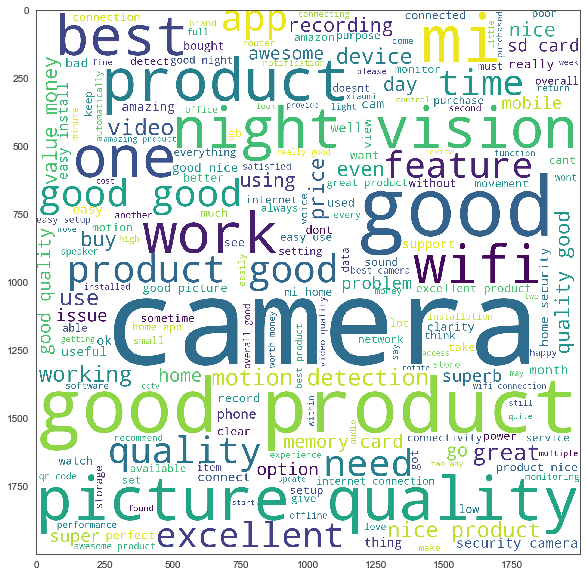

In [35]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)


In [36]:
###top 20 most frequent repeated words from Reviews
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[0:20]
freq


good       1642
product    1192
camera     1159
quality     717
nice        425
mi          327
home        321
best        317
picture     298
easy        294
work        277
motion      277
night       275
one         263
card        257
wifi        254
vision      241
app         240
video       233
working     230
dtype: int64

# Bigrams for Reviews 

In [34]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')
  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
counts_Reviews = collections.Counter()
for i in data['Reviews']:
    words_A = word_tokenize(i)
    counts_Reviews.update(nltk.bigrams(words_A))    
Bigram_counts_Reviews = counts_Reviews.most_common(10)
Bigram_counts_Reviews


[(('good', 'product'), 305),
 (('picture', 'quality'), 236),
 (('night', 'vision'), 206),
 (('motion', 'detection'), 163),
 (('nice', 'product'), 138),
 (('value', 'money'), 119),
 (('memory', 'card'), 105),
 (('quality', 'good'), 95),
 (('good', 'quality'), 94),
 (('sd', 'card'), 91)]

# Sentiment Analysis #####################

In [38]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,consumes around gb storage hour hd modepros ni...,0.500000
1,cannot connect device jiofi please help,0.000000
2,pro simple install first time need configure c...,0.205556
3,remember nothing perfect xiaomi already releas...,0.294565
4,future buyer product may good one lucky one ex...,0.212821


In [39]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,polarity
0,4.0,consumes around gb storage hour hd modepros ni...,0.500000
2,5.0,pro simple install first time need configure c...,0.205556
3,3.0,remember nothing perfect xiaomi already releas...,0.294565
4,1.0,future buyer product may good one lucky one ex...,0.212821
5,5.0,best home security video recording day gb,1.000000


In [40]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 



In [41]:
sent_type(data['polarity'])


positive
netural
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
netural
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
pos

positive
positive
positive
positive
positive
netural
positive
netural
positive
netural
positive
positive
netural
positive
negative
netural
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
netural
positive
positive
positive
netural
positive
positive
positive
positive
positive
positive
netural
positive
netural
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
netural
positive
positive
netural
positive
positive
netural
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
netural
positive
positive
netural
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
netural
netural
netural
positive
positive
positive
positive
positive
netural
netural
positive
po

positive
positive
positive
positive
positive
positive
positive
netural
positive
positive
negative
positive
netural
positive
positive
positive
positive
positive
positive
netural
netural
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
netural
positive
positive
positive
positive
netural
negative
positive
positive
netural
positive
netural
positive
netural
positive
positive
netural
positive
positive
positive
positive
netural
positive
positive
netural
positive
positive
positive
positive
positive
positive
positive
netural
negative
netural
positive
netural
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
netural
positive
positive
positive
positive
positive
positive
netural
positive
positive
positive
positive
negative
positive
netural
negative
p

In [42]:
data["category"]=data['polarity']

In [44]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"


In [46]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating        object
Reviews       object
polarity     float64
category    category
dtype: object

# Count Plot of Negative and Positive Words

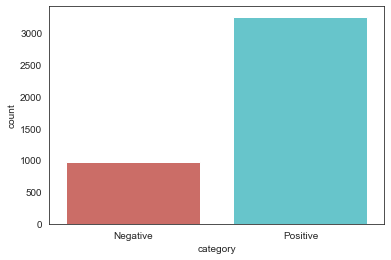

In [48]:
sns.countplot(x='category',data=data,palette='hls')


# Positive & Negative reviews WordCloud formation 

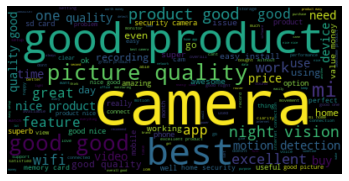

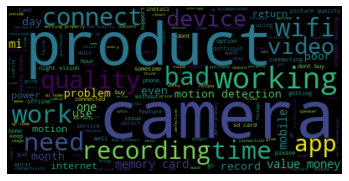

In [52]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

